# 필수 라이브러리 임포트

In [1]:
# 필수 라이브러리 
!pip install --upgrade joblib==1.1.0
!pip install --upgrade scikit-learn==1.1.3
!pip install mglearn

# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 6.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2

In [2]:
import logging

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [3]:
import mglearn

from sklearn.model_selection import train_test_split 

colab 한글 깨짐 방지

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
# import matplotlib.font_manager as fm
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 앙상블(Ensemble)
> 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.

- Bagging: variance를 감소시키는 역할
- Boosting: bias를 감소시키는 역할

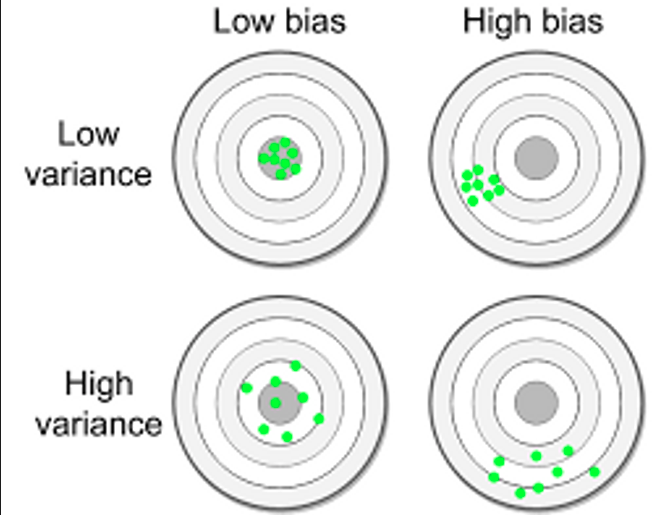

## Bagging

1. 데이터로부터 복원추출을 통해 n개의 bootstrap sample 생성
2. 해당 sample에 대해서 모델 학습
3. 1,2 과정을 M번 반복한 후 최종 Bagging 모델을 정의 

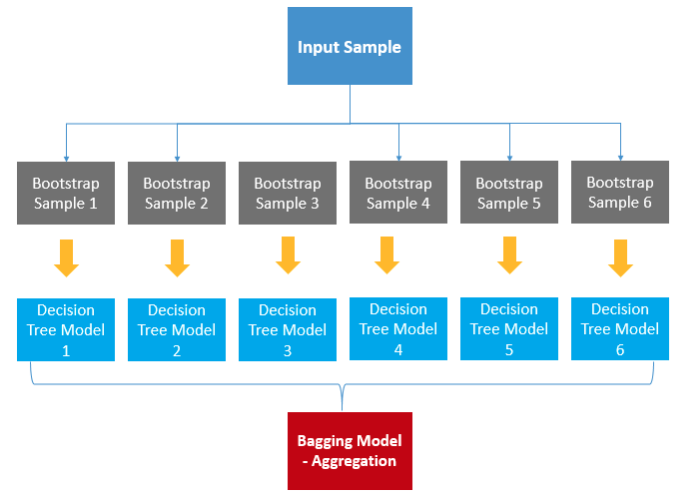

### Random Forest
> Decision Tree의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것이다. 랜덤 포레스트는 이 문제를 회피할 수 있는 방법이다.   

- 랜덤하게 일 부 샘플들과 일부 피쳐들을 뽑아서 여러개의 트리를 만들어서 앙상블하는 모델


#### 주요 파라미터
- n_estimators: 생성할 트리의 개수  
- max_features: 각 트리가 얼마나 무작위가 될지를 결정하며 작을 수록 과대적합을 줄여줍니다. (일반적으로 기본값을 추천합니다.)

In [5]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons 

In [6]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3) 

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, stratify=y, random_state=42
)

In [7]:
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_tr, y_tr)

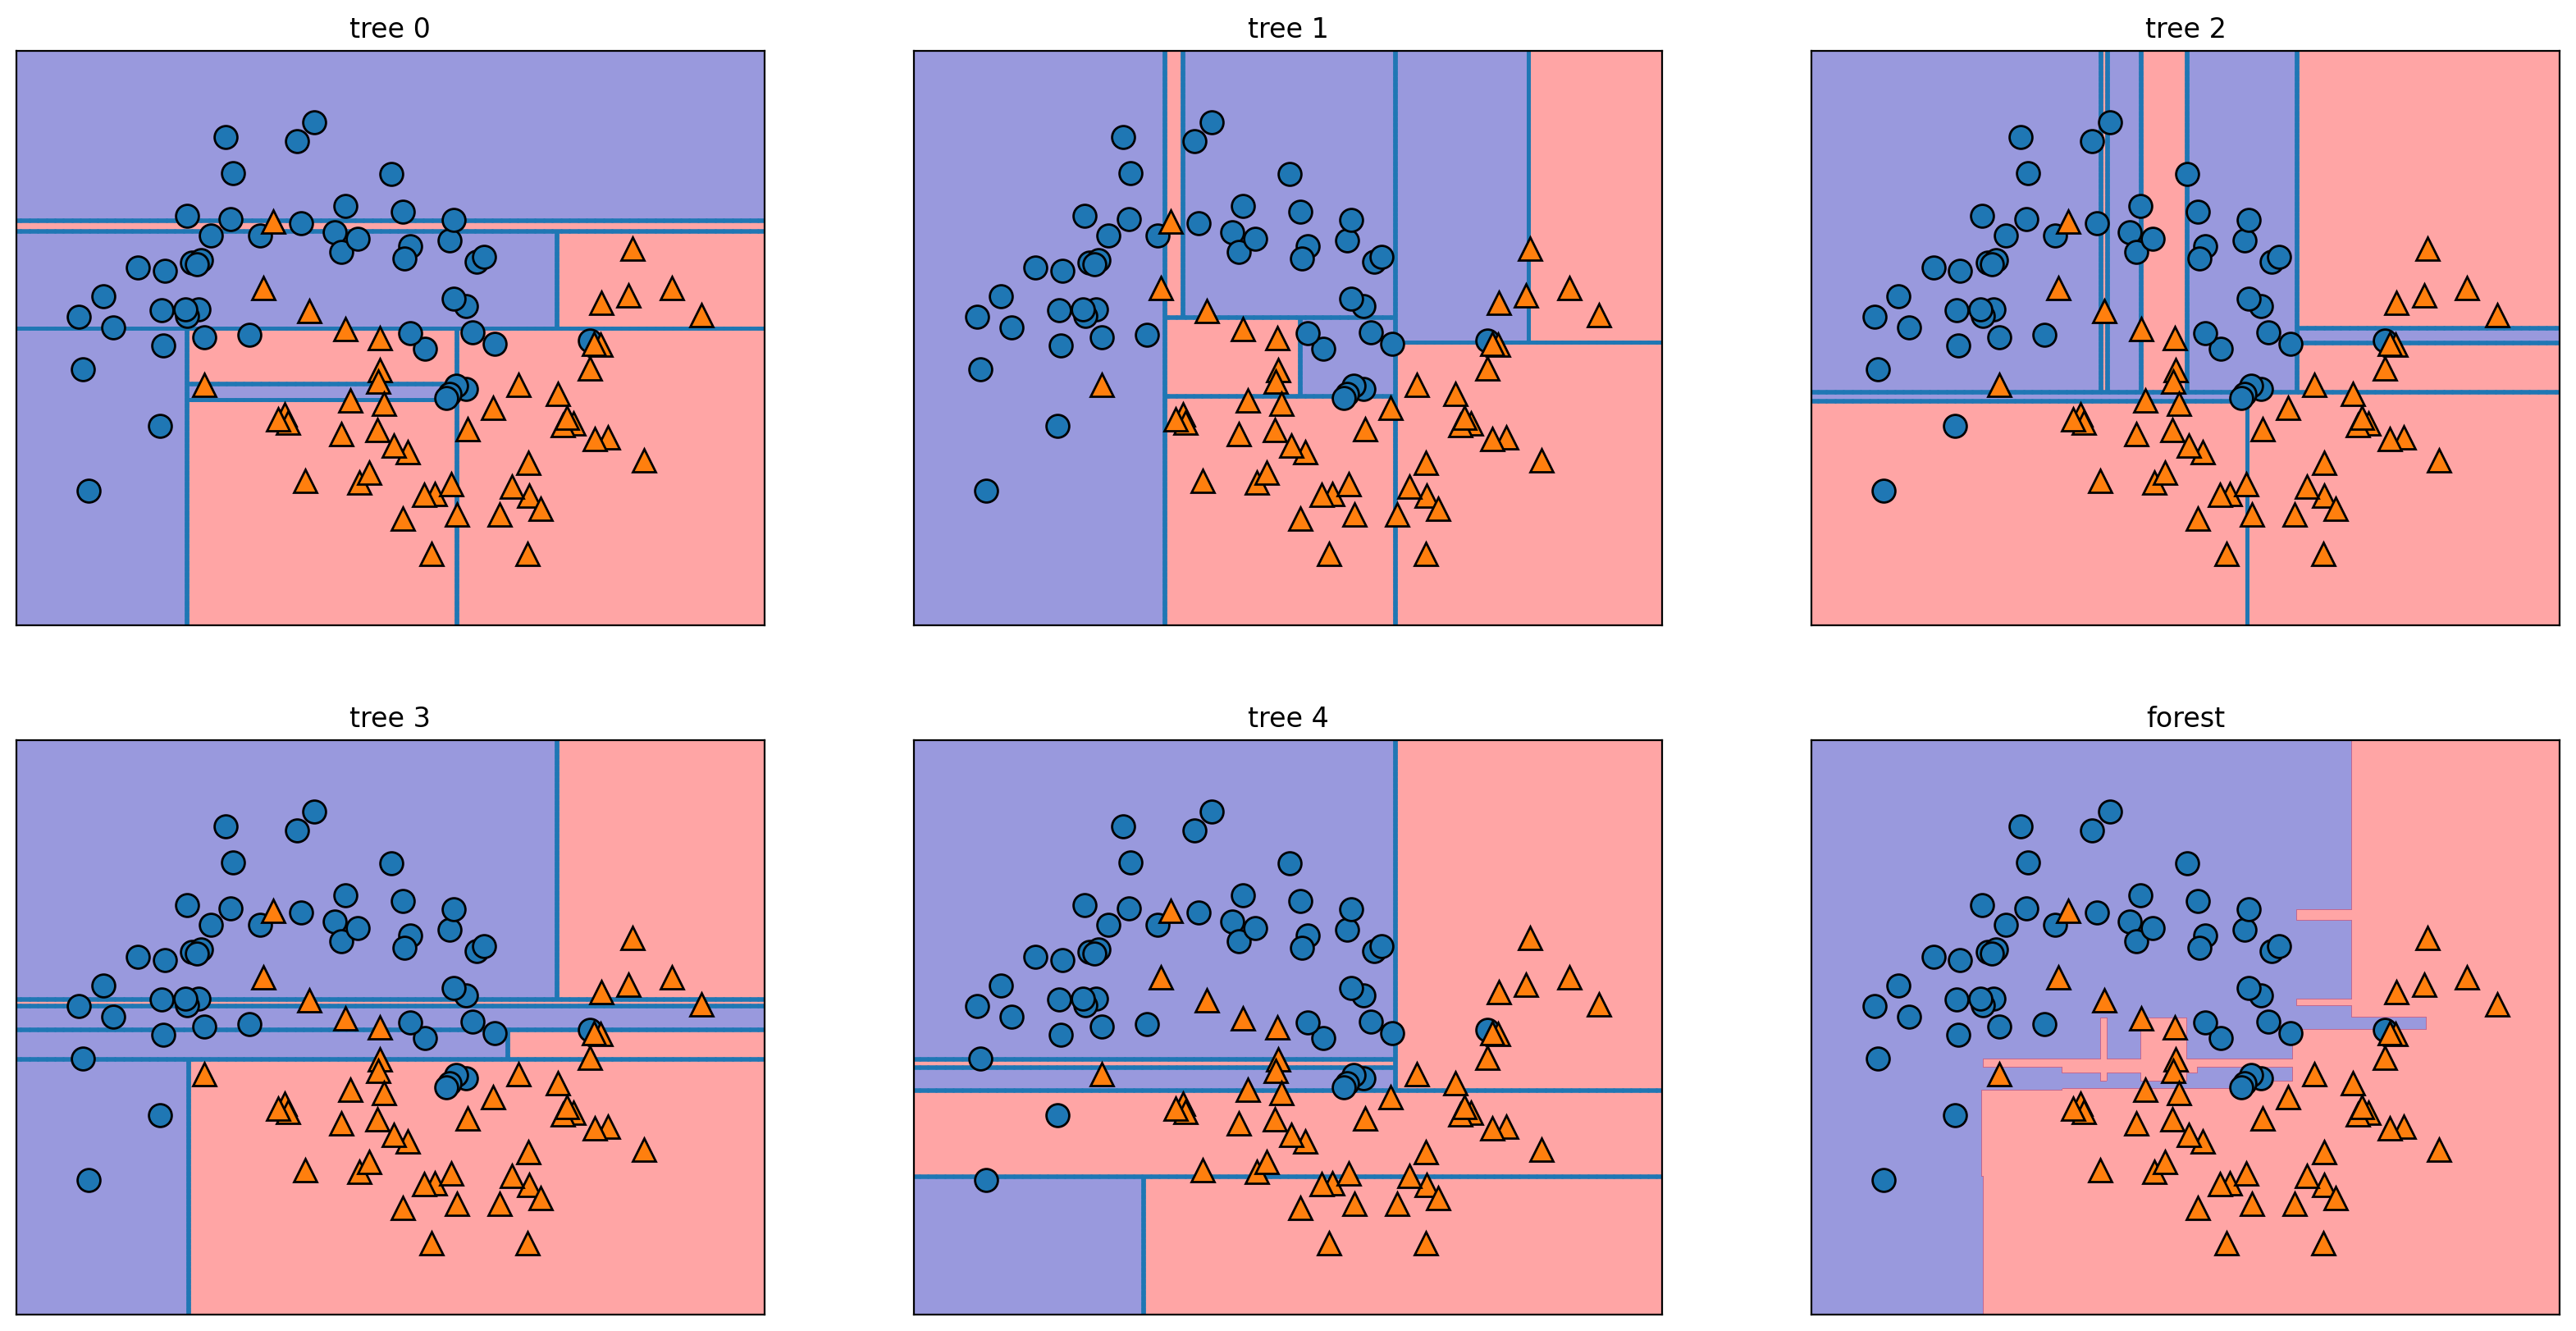

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20,10)) 

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title(f"tree {i}")
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=0.4) 
axes[-1,-1].set_title("forest")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [11]:
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(X_tr, y_tr)} / 테스트용 평가지표: {forest.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.958041958041958


상기 결과를 보면 오버피팅이 된 것을 알 수 있다. 하이퍼파라미터를 적용해보자

In [12]:
hp = {
    "random_state" : 0,
    "max_features" : "sqrt", # None 을 줄경우 전체피쳐 사용 
    "n_estimators" : 100, # 트리개수 
    "max_depth" : 10,
    "min_samples_split" : 10,
    "min_samples_leaf" : 3,
}

forest = RandomForestClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(X_tr, y_tr)} / 테스트용 평가지표: {forest.score(X_te, y_te)}')

훈련용 평가지표: 0.9882629107981221 / 테스트용 평가지표: 0.958041958041958


## Boosting

1. weak learner를 생성한 후 Error를 계산
2. Error에 기여한 Sample마다 다른 가중치를 주고 해당 Error를 감소시키는 새로운 모델 학습
3. 1,2 과정을 M번 반복한 후 최종 Boosting 모델을 정의

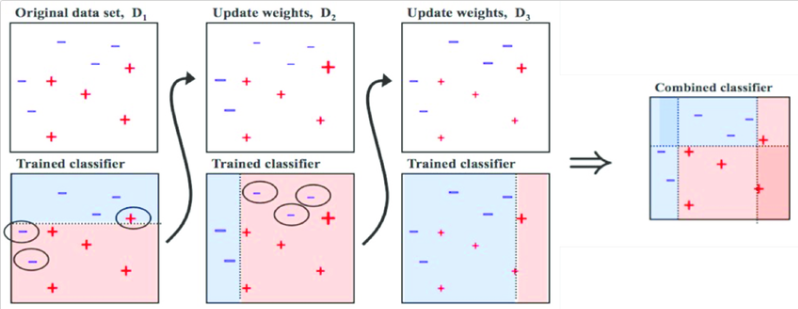

### Gradient Boost 
> 보통 max_depth를 1 ~ 5 이하로 설정하여 약한 트리들을 만들어 학습하는 알고리즘입니다.  
 
- 트리기반 부스팅 앙상블 모델
- 머신러닝 알고리즘 중에서 가장 예측 성능이 높다고 알려졌고 인기있는 알고리즘

#### 주요 파라미터
- max_depth: 1 ~ 5 이하로 설정
- n_estimators: 생성할 트리의 개수  
- learning_rate: 얼마나 강하게 보정할지를 정하는 수치

In [13]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [15]:
gradient = GradientBoostingRegressor(random_state=0).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.9954470985502689 / 테스트용 평가지표: 0.8456938110259314


상기 모델 학습은 오버피팅이 되었다. 하이퍼파라미터를 적용해보자

In [16]:
hp = {
    "random_state" : 0,
    "max_depth" : 1,
    "n_estimators" : 100
}

gradient = GradientBoostingRegressor(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.8864176486236018 / 테스트용 평가지표: 0.8290914723510503


In [17]:
hp = {
    "random_state" : 0,
    "max_depth" : 1,
    "n_estimators" : 100,
    "learning_rate" : 0.2,
}

gradient = GradientBoostingRegressor(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.9030424533281206 / 테스트용 평가지표: 0.8335348874914779


### [XGBoost](https://xgboost.readthedocs.io/en/stable/index.html)
> GBM(Gradient Boost)를 병렬 학습이 지원되도록 구현한 라이브러리이다. 따라서 GBM보다 학습이 빠르다.

#### [주요 파라미터](https://wooono.tistory.com/97)  
- 일반 파라미터
> 부스팅을 수행할 때 트리를 사용할지, 선형 모델을 사용할지 등을 고른다. 
- 부스터 파라미터
> 선택한 부스터에 따라서 적용할 수 있는 파라미터 종류가 다르다. 
- 학습 과정 파라미터
> 학습 시나리오를 결정한다.

In [18]:
from xgboost import XGBClassifier, plot_importance

hp = {
    "random_state" : 42
}

xgb = XGBClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {xgb.score(X_tr, y_tr)} / 테스트용 평가지표: {xgb.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.965034965034965


과적합 방지를 위해 조정해야 하는 것
- learning_rate 낮추기 & n_estimators 높이기
- max_depth 낮추기
- min_child_weight 높이기
- gamma 높이기

In [19]:
hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 200, # 수행할 부스팅 단계 수
    "learning_rate": 0.01,
    "min_child_weight": 2,
    "gamma": 1
}

xgb = XGBClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {xgb.score(X_tr, y_tr)} / 테스트용 평가지표: {xgb.score(X_te, y_te)}')

훈련용 평가지표: 0.9812206572769953 / 테스트용 평가지표: 0.951048951048951


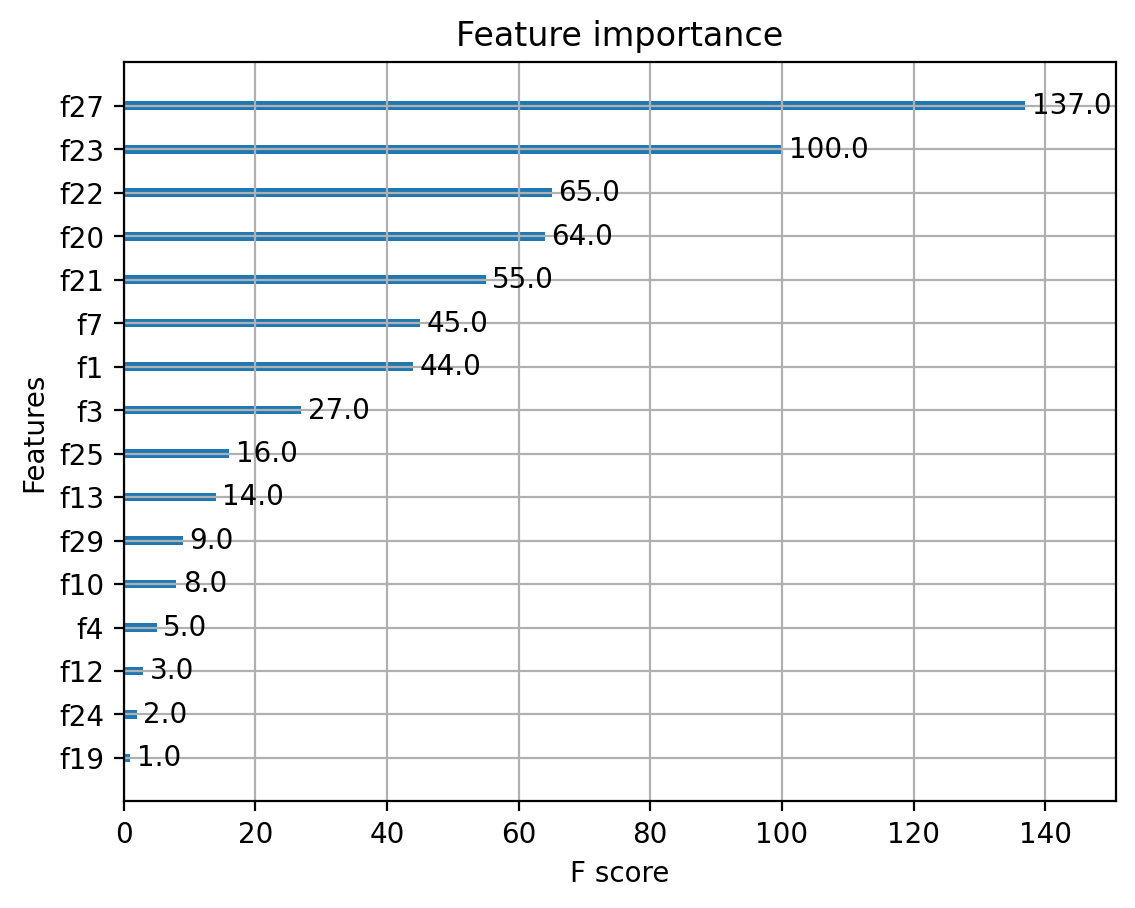

In [20]:
import matplotlib.pyplot as plt
plot_importance(xgb)
plt.show()

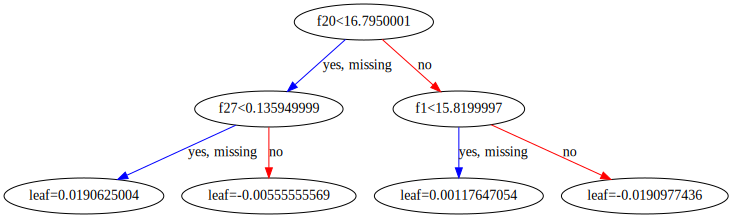

In [21]:
from xgboost import to_graphviz

to_graphviz(xgb)

### [Light GBM](https://lightgbm.readthedocs.io/en/latest/index.html)

> LightGBM은 트리 기준 분할이 아닌 리프 기준 분할 방식을 사용한다. 트리의 군형을 맞추지 않고 최대 손실 값을 갖는 리프 노드를 지속적으로 분할하면서 깊고 비대칭적인 트리를 생성한다.   

> 이렇게 하면 트리 기준 분할 방식에 비해 예측 오류 손실을 최소화할 수 있다.  

- 장점
  - XGBoost보다 빠르다.
  - 대용량 데이터 처리 가능(메로리 사용량이 상대적으로 적다)

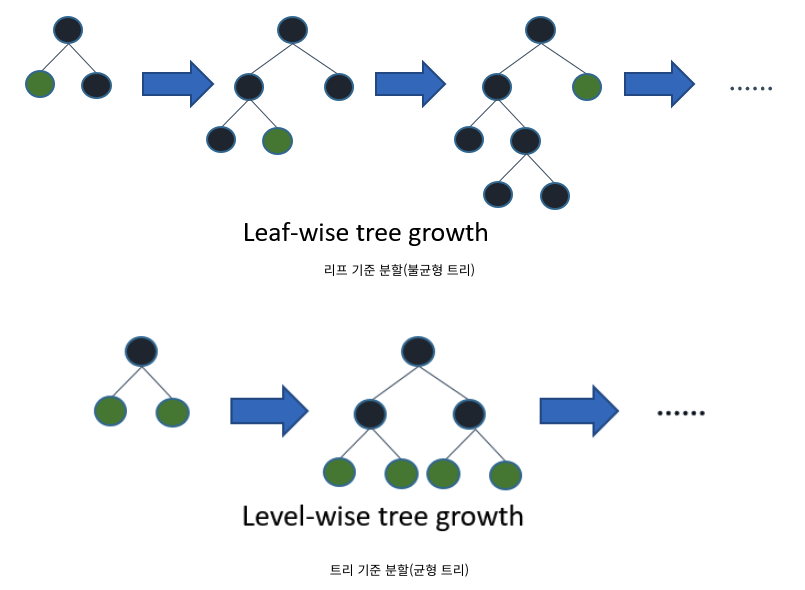

#### [주요파라미터](https://nicola-ml.tistory.com/51)
- num_leaves: 클수록 정확도는 높아지지만 오버피팅 발생 가능
- min_data_in_leaf: 클수록 오버피팅 방지
- max_depth: 낮추기
- learning_rate 낮추기 & n_estimators 높이기

In [22]:
from lightgbm import LGBMClassifier, plot_importance

In [23]:
hp = {
    "random_state" : 42
}

lgb = LGBMClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lgb.score(X_tr, y_tr)} / 테스트용 평가지표: {lgb.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.965034965034965


오버피팅 발생!!

In [24]:
hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 100,
    "learning_rate": 0.01,
}

lgb = LGBMClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lgb.score(X_tr, y_tr)} / 테스트용 평가지표: {lgb.score(X_te, y_te)}') 

훈련용 평가지표: 0.971830985915493 / 테스트용 평가지표: 0.951048951048951


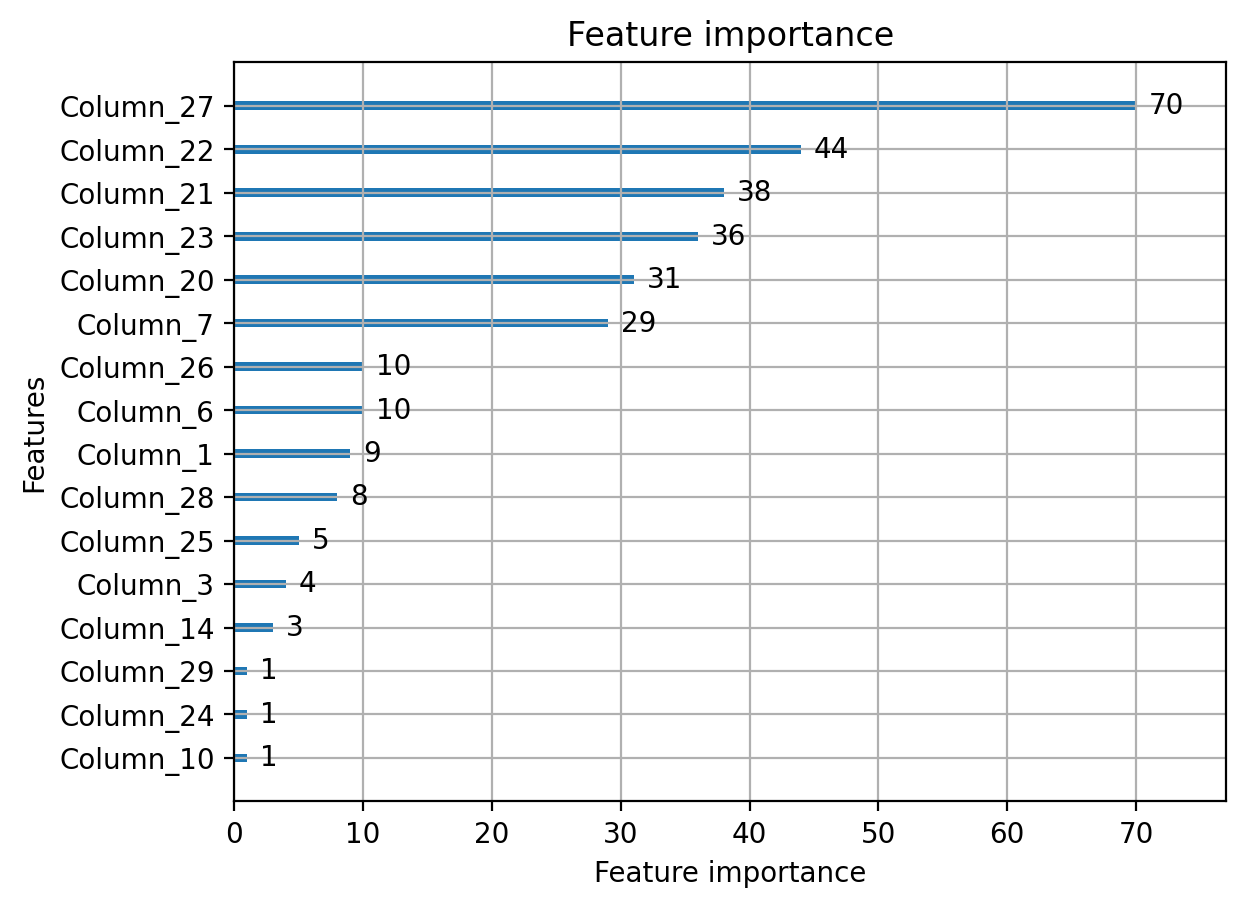

In [25]:
plot_importance(lgb)
plt.show()

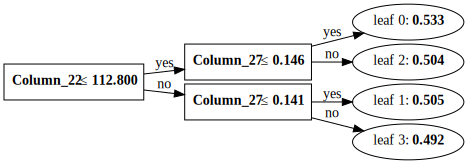

In [26]:
from lightgbm import create_tree_digraph
create_tree_digraph(lgb)

### [Catboost](https://catboost.ai/en/docs/)
- 범주형 변수가 많을 경우 높은 성능과 함께 빠른 학습 속도를 제공한다.
  - 범주형 변수를 인코딩 하지 않고 넣어도 된다.
- 수치형 변수가 많을 경우 매우 느리다. 


LightGBM은 알고리즘 종류 중 DFS(깊이 우선 탐색)처럼 트리를 우선적으로 깊게 형성하는 방식이다. 반면에 XGBmmost와 Catboost는 BFS(너비 우선 탐색)처럼 우선적으로 넓게 트리를 형성한다.  

이때 XGBoost와 Catboost의 차이점은 트리가 나누어지는 Feature들이 대칭인지 여부에 따라 차이가 난다. 아래 그림을 참고하자

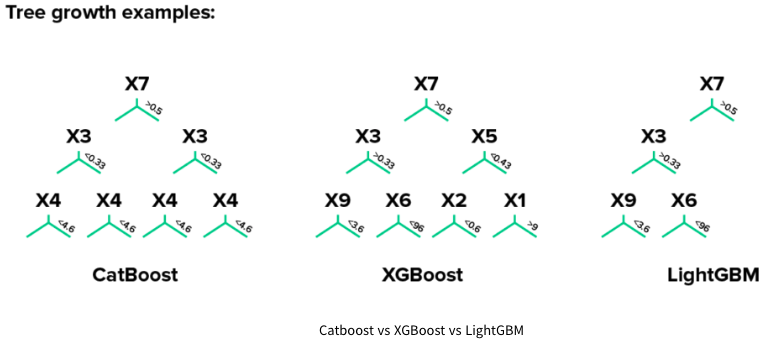

In [27]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.4 MB/s eta 0:00:00


In [28]:
from catboost import CatBoostClassifier

In [29]:
hp = {
    "random_state" : 42,
    "verbose" : 0 # 부스팅 단계 출력 안보이게 하기
}

cat = CatBoostClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {cat.score(X_tr, y_tr)} / 테스트용 평가지표: {cat.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.965034965034965


In [30]:
hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 100, # 수행할 부스팅 단계 수
    "verbose" : 0 # 부스팅 단계 출력 안보이게 하기
}

cat = CatBoostClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {cat.score(X_tr, y_tr)} / 테스트용 평가지표: {cat.score(X_te, y_te)}')

훈련용 평가지표: 0.9882629107981221 / 테스트용 평가지표: 0.965034965034965


## Voting
> 다른 종류의 모델들의 예측값을 합쳐 최종 결과를 도출해내는 과정

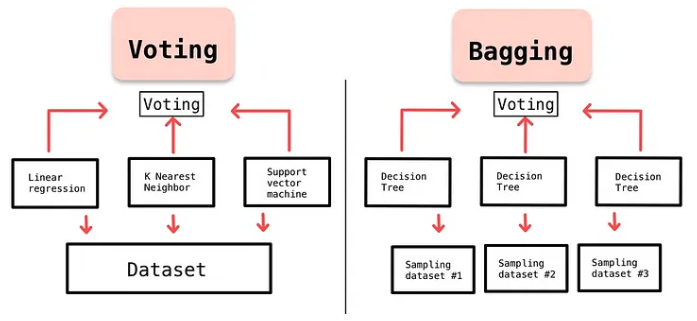

- Hard voting
  - 모델들의 예측 결과값을 다수결로 최종 class 결정
- Soft voting
  - 모델들의 예측 결과값간 확률을 평균하여 최종 class 결정

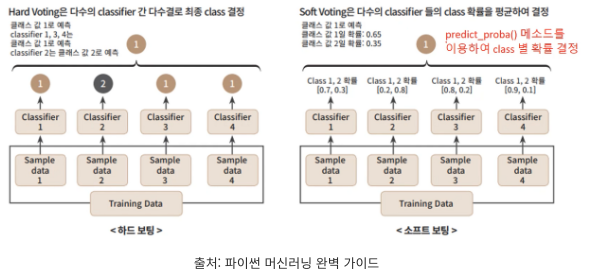

In [31]:
from sklearn.ensemble import VotingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [32]:
SEED = 42
estimators = [
    ( "mlp" , MLPClassifier(max_iter=1000,random_state=SEED) ),
    ( "lr" , LogisticRegression(random_state=SEED) ),
    ( "rf" , RandomForestClassifier(random_state=SEED) )
]

In [33]:
hp = {
    "estimators" : estimators,
    "voting" : "soft"
}

vot = VotingClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {vot.score(X_tr, y_tr)} / 테스트용 평가지표: {vot.score(X_te, y_te)}')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련용 평가지표: 0.9694835680751174 / 테스트용 평가지표: 0.9440559440559441


In [34]:
hp = {
    "estimators" : estimators,
    "voting" : "hard"
}

vot = VotingClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {vot.score(X_tr, y_tr)} / 테스트용 평가지표: {vot.score(X_te, y_te)}')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련용 평가지표: 0.9647887323943662 / 테스트용 평가지표: 0.9370629370629371


## Stacking
> 개별적인 모델들이 학습하고 예측한 데이터를 쌓아서 또 다른 학습데이터를 만들고 이 데이터를 기반으로 메타 모델을 하나 더 만들어 예측하는 모델이다.

1. training dataset을 이용하여 sub model 예측 결과를 생성한다.
2. 1번의 output 결과를 이용하여 training data로 사용하여 meta learner 모델을 생성한다.

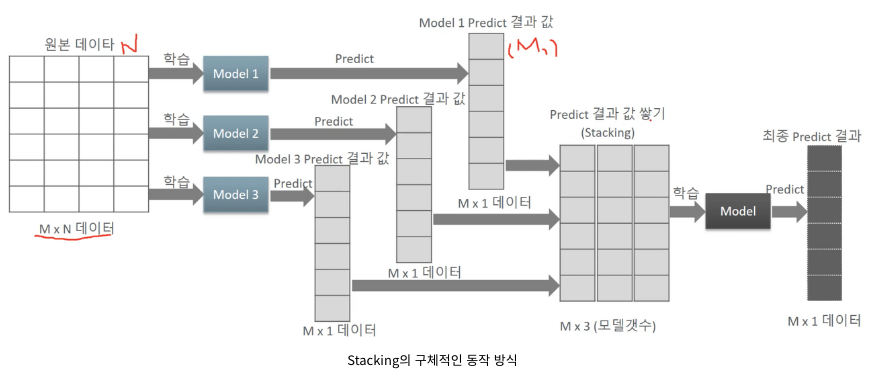

In [35]:
from sklearn.ensemble import StackingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [36]:
SEED = 42
estimators = [
    ( "mlp" , MLPClassifier(max_iter=1000,random_state=SEED) ),
    ( "lr" , LogisticRegression(random_state=SEED) ),
    ( "rf" , RandomForestClassifier(random_state=SEED) )
]

hp = {
    "estimators" : estimators,
    "final_estimator" : LogisticRegression(random_state=SEED)
}

stack = StackingClassifier(**hp,n_jobs=-1).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {stack.score(X_tr, y_tr)} / 테스트용 평가지표: {stack.score(X_te, y_te)}')

훈련용 평가지표: 0.9835680751173709 / 테스트용 평가지표: 0.965034965034965
